In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregar arquivo para um dataFrame
df_exames = pd.read_csv('./exame_diabetes.csv')

In [3]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [8]:
# apresentar as 10 primeiras
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


In [5]:
# remover coluna
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [ ]:
# tranformar variaveis em boleanas numericas
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

<Axes: >

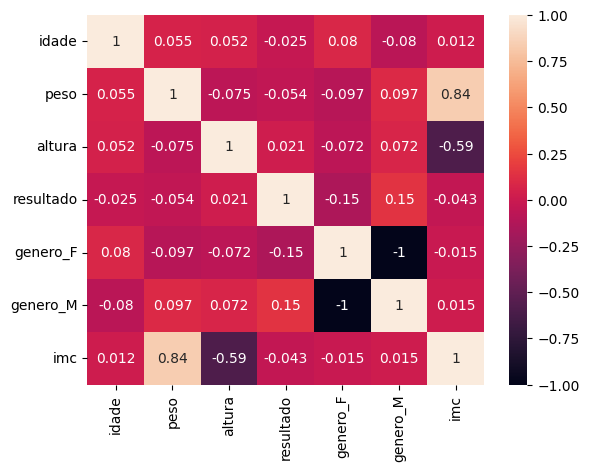

In [20]:
# apresentar mapa de calor com correlação entre as variaveis no dtframe
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

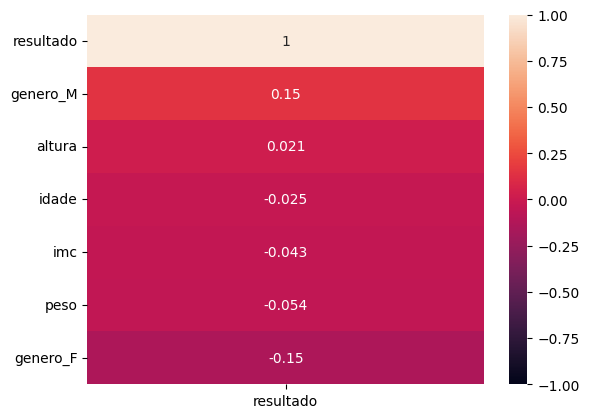

In [19]:
# mapa de correlação so com a variavel target (resultdo)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True)

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

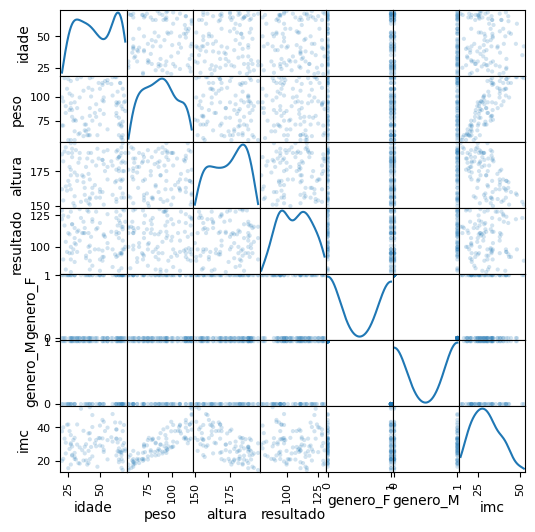

In [21]:
# plot de scatter (dispersao) com correlação
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

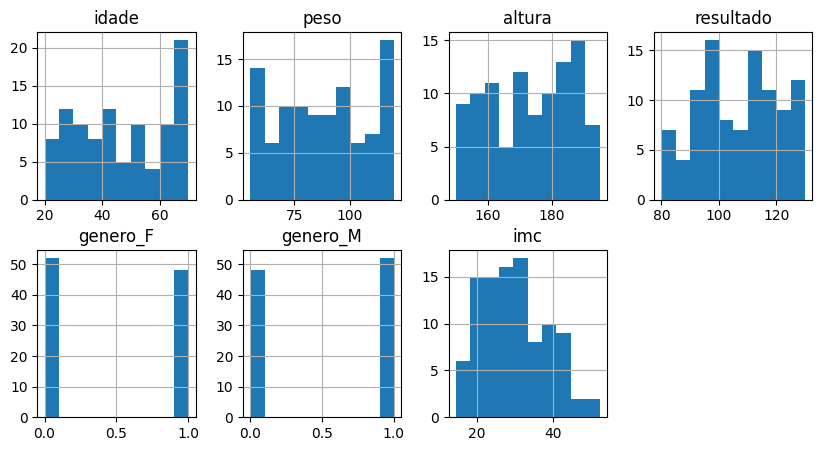

In [22]:
# histograma de todas as variaveis
df_exames.hist(layout=(2,4), figsize=(10,5))

In [17]:
# Criar uma feat nova
# IMC
# peso / altura^2
df_exames['imc'] = (df_exames.peso / ((df_exames.altura/100)**2))

In [18]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [23]:
dict_regressao = {'tempo_casa': [1,3,6,9,10,14,18], 'salario': [1500, 3000, 4500, 6000, 7000, 8500, 10000]}

In [24]:
df_regressao_simples = pd.DataFrame.from_dict(dict_regressao)

<Axes: xlabel='tempo_casa', ylabel='salario'>

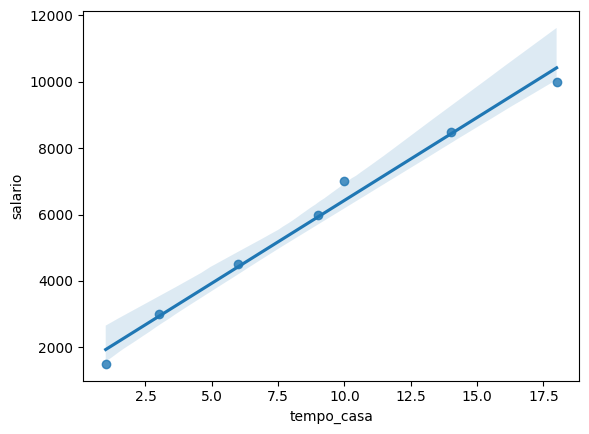

In [25]:
sns.regplot(data=df_regressao_simples, x='tempo_casa', y='salario')

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [29]:
# modelo 1 - sem IMC
X = df_exames.drop(columns=['imc', 'resultado'])
Y = df_exames['resultado']

In [32]:
# dividir conjunto entre treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=51)

In [33]:
len(X_train)

70

In [34]:
X_test

,idade,peso,altura,genero_F,genero_M
71,53,99,151,1,0
43,56,66,178,0,1
11,48,60,191,0,1
83,32,88,172,0,1
78,56,114,169,0,1
19,67,58,192,1,0
80,65,94,185,0,1
4,27,55,176,0,1
79,37,59,171,0,1
75,26,86,178,0,1


In [35]:
# treinar o algoritmo de regressao linear - Modelo 1
model_1 = LinearRegression().fit(X_train, Y_train)

In [36]:
# Gerar predições do conjunto de testes com base no modelo 1
Y_pred = model_1.predict(X_test)

In [37]:
Y_pred

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])

In [38]:
# Equação da Reta - Regressao Linear
model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [39]:
model_1.intercept_

np.float64(94.21133142019856)

In [40]:
# R2 score quanro que x explica y
model_1.score(X_train, Y_train)


0.06218388634297234

In [41]:
# R2 score - conjunto de testes
model_1.score(X_test, Y_test)

-0.1364090447910642

In [42]:
# R2 score - testes
r2_score(Y_test, Y_pred)

-0.1364090447910642

In [43]:
# MAE (Erro medio absoluto, qual a diferença media)
mean_absolute_error(Y_test, Y_pred)

12.695569181179541